# Explore here

In [1]:
# Your code here
import pandas as pd
import numpy as np


df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")


df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


hay que hacer un eda completo


In [2]:
#vamos a quitar las columnas menos relevantes para el problema

#df.drop("region",axis=1,inplace=True)
df.head()




,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#luego vamos a ver si hay duplicados
df.duplicated().sum()

np.int64(1)

In [4]:
#como solo hay un duplicado, lo borramos
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


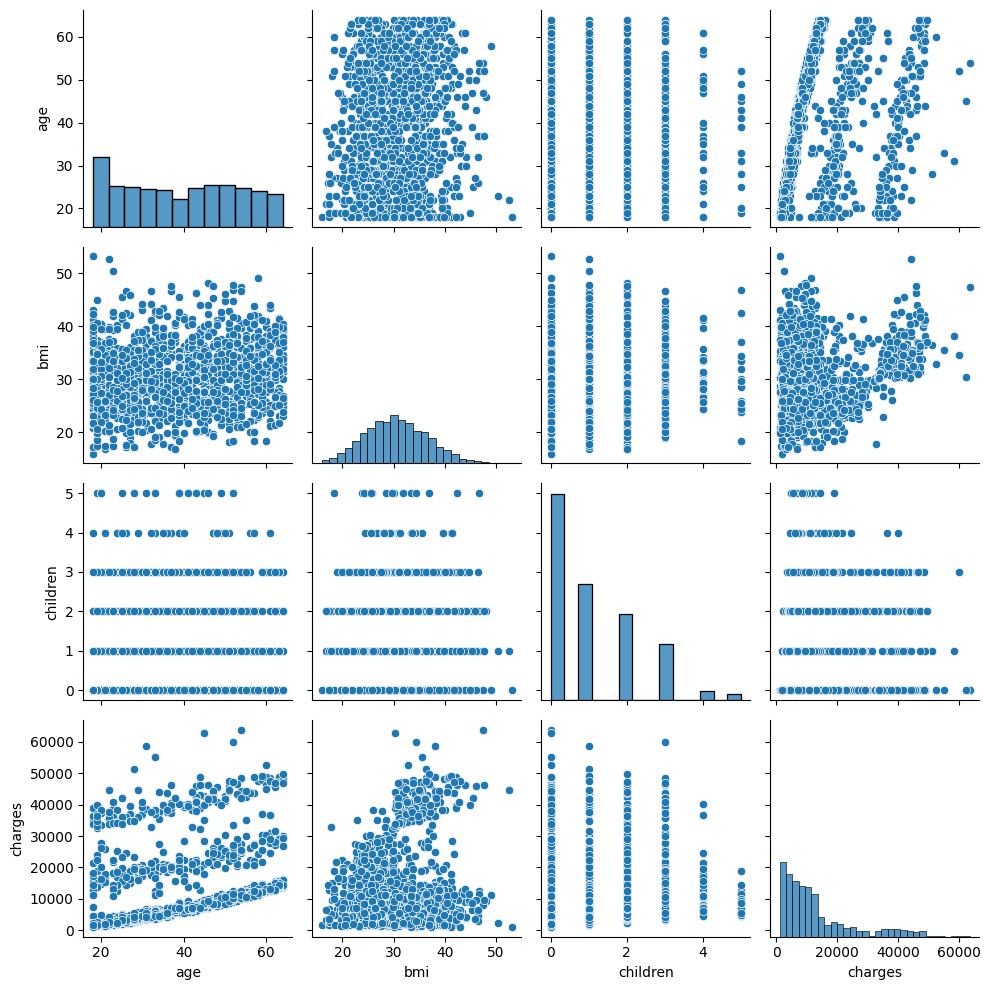

In [5]:
#ahora vamos a ver que tipo de relaciones hay entre las variables 
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.tight_layout()
plt.show()

In [6]:
#dependiendo de la edad de la persona, podemos notar una linealidad en la grafica, hay distintos sectores dentro de la grafica, que podrian deberse a otra caracteristica que los diferencia.


In [7]:
#ahora veremos los tipos de variables que tenemos en el df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#como tenemos variables categoricas, debemos factorizarlas
df["sex"]=pd.factorize(df["sex"])[0]#factorizamos df["sex"]
df["smoker"]=pd.factorize(df["smoker"])[0]#factorizamos df["smoker"]

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


<Axes: >

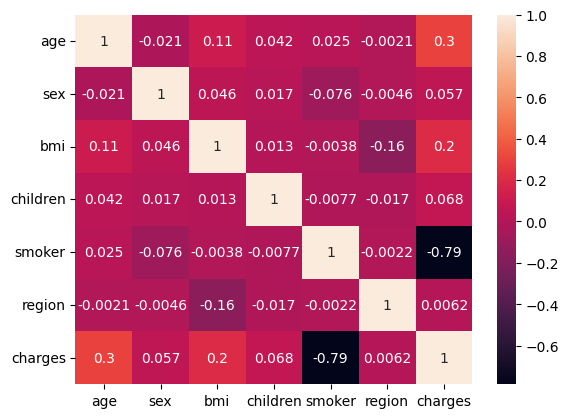

In [11]:
#ahora podemos hacer un mapa de calor
sns.heatmap(df.corr(),annot=True)

se nota una relacion considerable con los fumadores, la otra caracteristica que podria tener relacion es la edad, pero es mucho menor 


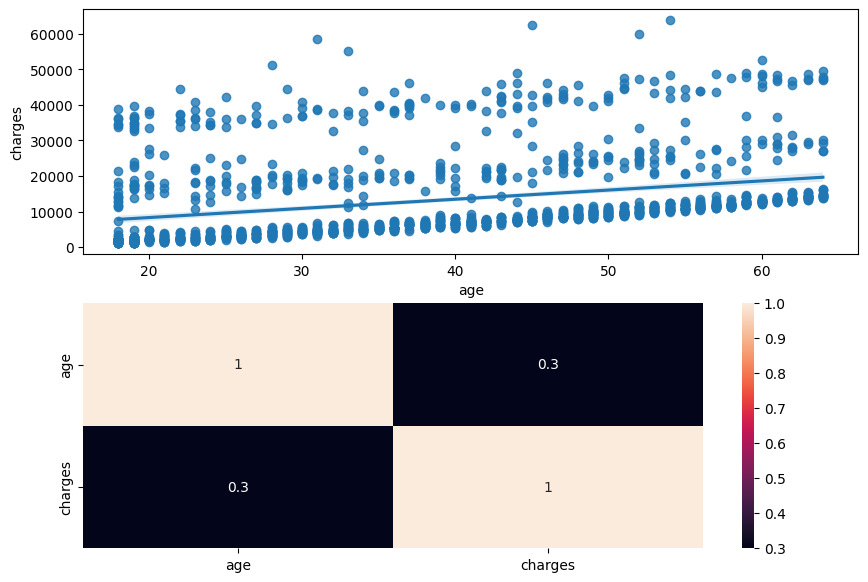

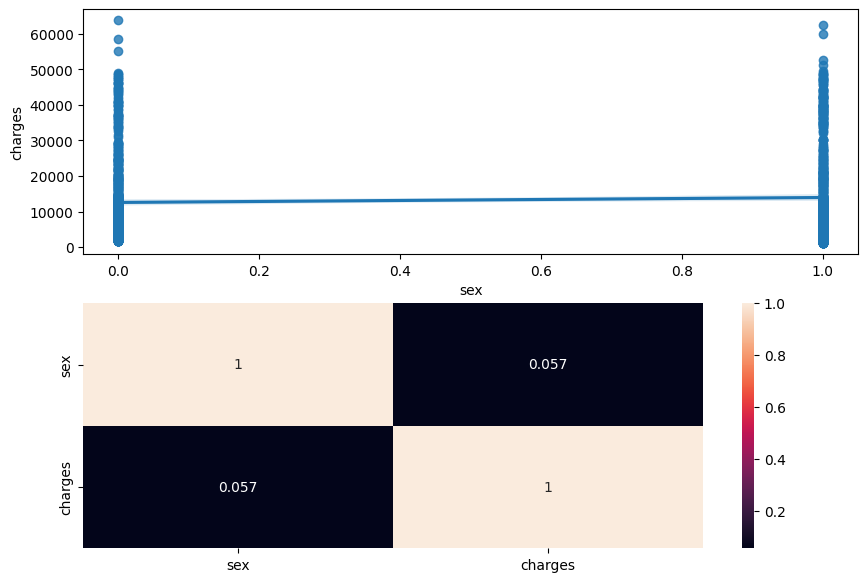

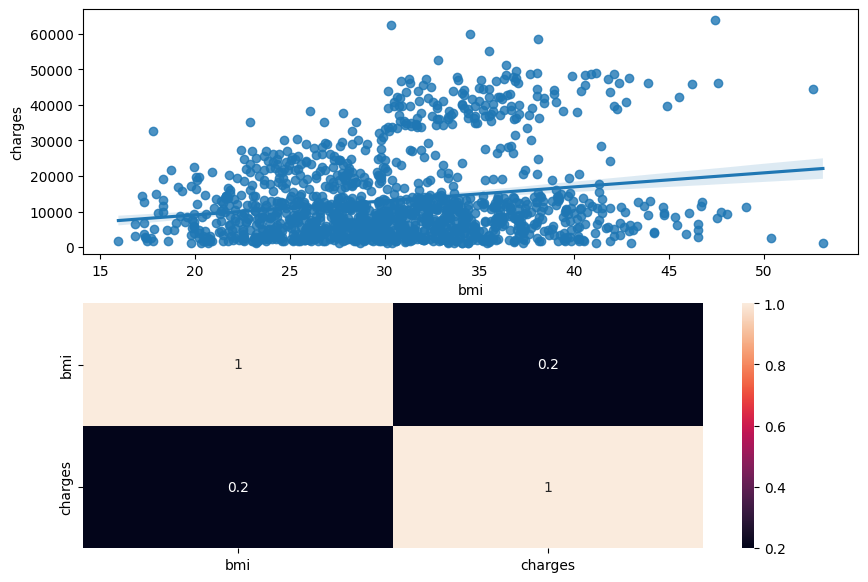

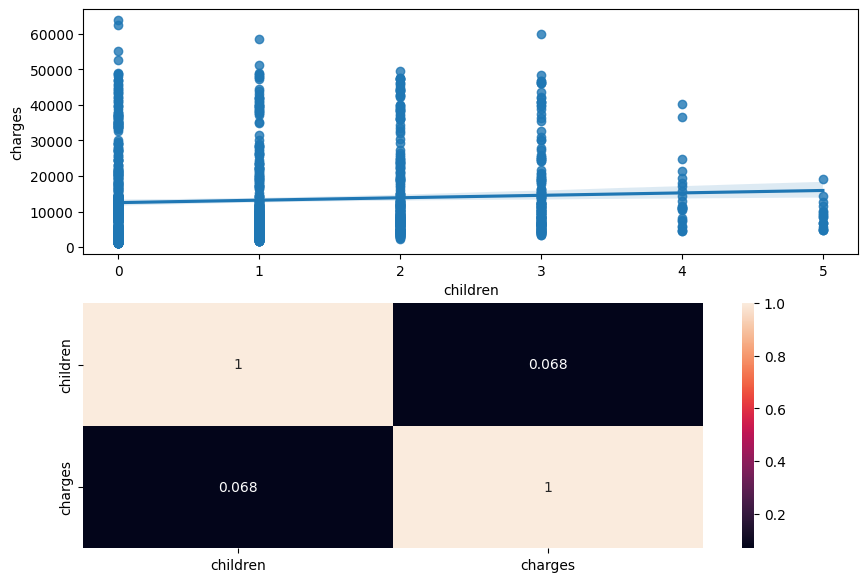

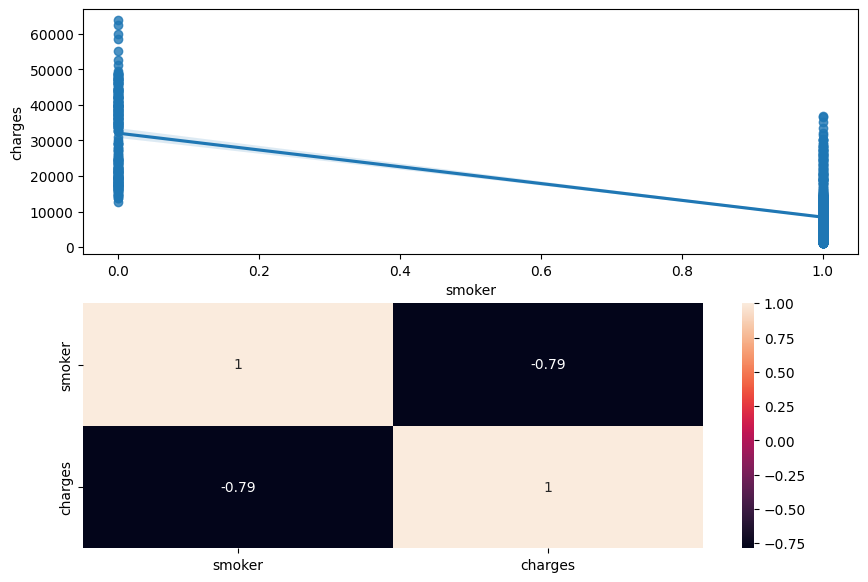

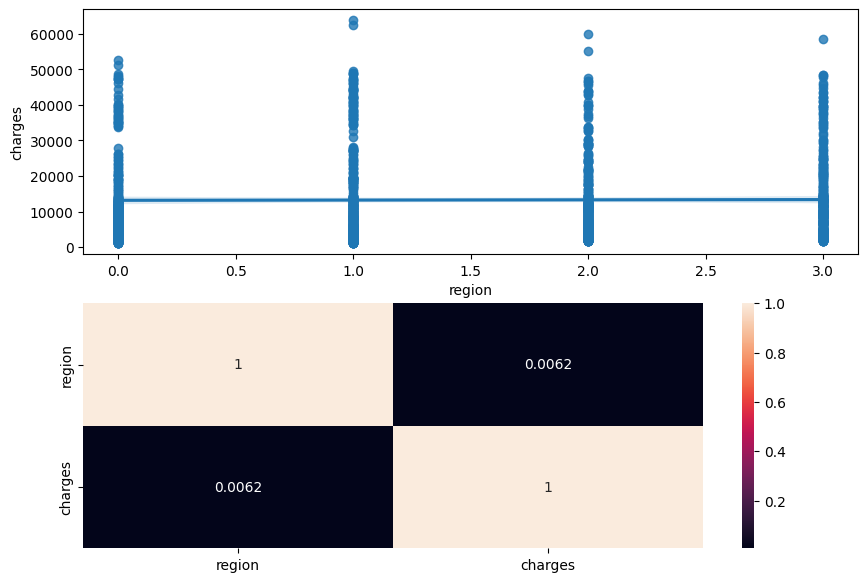

In [12]:

for columna in df.columns:
    if columna not in ("charges"):
        fig,axis=plt.subplots(2,1,figsize=(10,7))
        sns.regplot(df,x=columna,y=df["charges"],ax=axis[0])
        sns.heatmap(df[[columna,"charges"]].corr(),annot=True,ax=axis[1])
        


In [ ]:
#ahora, que vimos todos los graficos, podemos quedarnos con las variables mas importantes.
X=df[["smoker","bmi","age"]]
y=df[["charges"]]
#diferenciamos las variables de entrenamiento de las de test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
X_train


,smoker,bmi,age,sex,region
560,1,19.950,46,0,2
1285,1,24.320,47,0,3
1142,1,24.860,52,0,1
969,1,34.320,39,0,1
486,1,21.470,54,0,2
...,...,...,...,...,...
1095,1,31.350,18,0,3
1130,1,23.870,39,0,1
1294,1,25.175,58,1,3
860,0,47.600,37,0,0


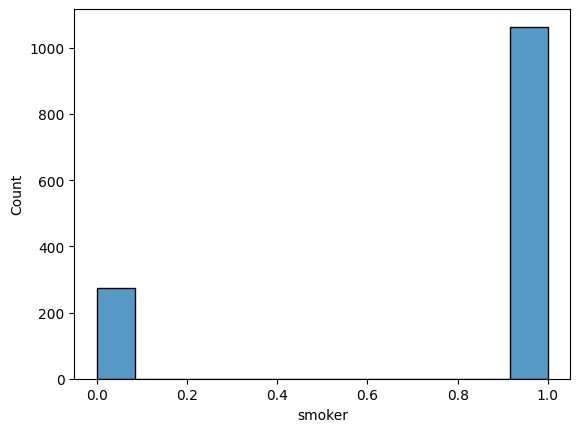

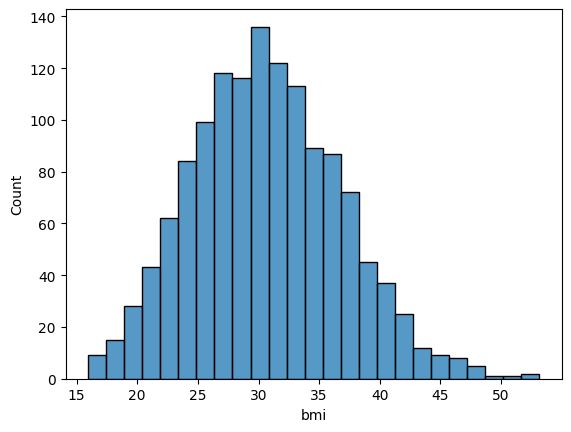

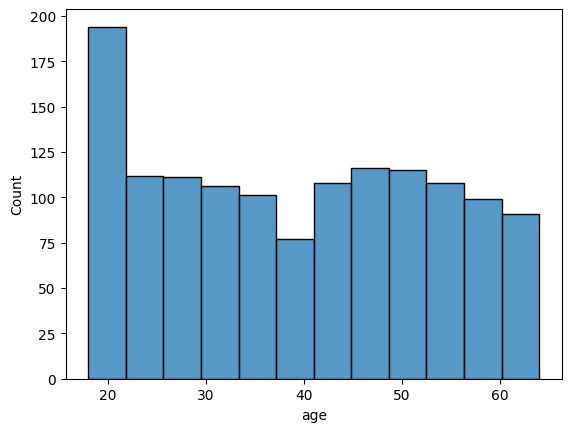

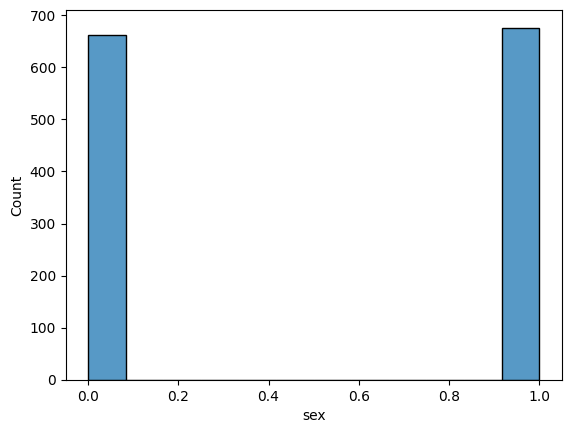

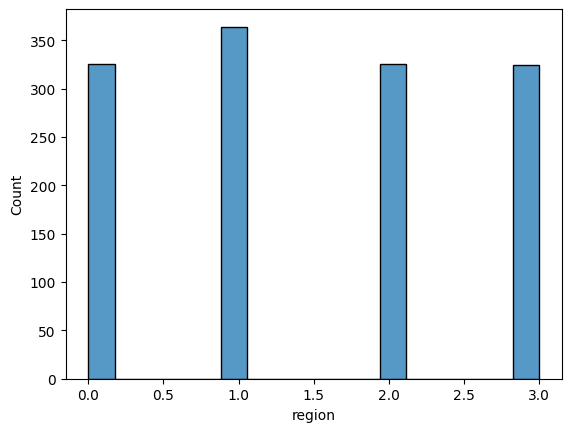

In [20]:
#para saber que tipo de normalizacion necesito, voy a ver como se distribuyen los datos.
for columnas in X.columns:
    sns.histplot(X,x=X[columnas])
    plt.show()

como solo hay una variable que tiene un comportamiento normal, vamos a utilizar MinMax_scaler


In [21]:
from sklearn.preprocessing import MinMaxScaler
procesar=MinMaxScaler()
X_train_esc=procesar.fit_transform(X_train)
X_test_esc=procesar.transform(X_test)
#ahora hay que transformarlos en dataframe
X_train_esc=pd.DataFrame(X_train_esc,columns=X_train.columns,index=X_train.index)
X_test_esc=pd.DataFrame(X_test_esc,columns=X_test.columns,index=X_test.index)


In [22]:
from sklearn.linear_model import LinearRegression
modelo=LinearRegression()
modelo.fit(X_train_esc,y_train)
print(f'inttercepcion del modelo: {modelo.intercept_}')
print(f'coeficientes b1,b2,b3: {modelo.coef_}')


inttercepcion del modelo: [21309.87525343]
coeficientes b1,b2,b3: [[-2.36682697e+04  1.24451331e+04  1.19318252e+04 -1.72478859e+00
   8.26228302e+02]]


In [23]:
#predicciones del modelo
y_pred=modelo.predict(X_test_esc)
y_pred

array([[ 8556.63142984],
       [ 7568.92088951],
       [37450.39068233],
       [ 8729.73017417],
       [27462.02978858],
       [10810.04004534],
       [  646.53472691],
       [17470.07511861],
       [ 1507.01495887],
       [10493.92757682],
       [27246.65262812],
       [ 9054.97908471],
       [ 5333.82778747],
       [37682.22011764],
       [40834.8574377 ],
       [36799.88301253],
       [14904.32717931],
       [36028.18145285],
       [ 9227.79779415],
       [32003.25309314],
       [ 2114.0370884 ],
       [ 9695.91659342],
       [ 2734.01996932],
       [ 7489.08570457],
       [10564.1944071 ],
       [13403.91755846],
       [14944.27045668],
       [ 5361.66365966],
       [ 9552.52009474],
       [ 2662.9895827 ],
       [ 7814.58408602],
       [13620.40244348],
       [ 5026.55940669],
       [ 2640.9926921 ],
       [ 4415.80585866],
       [13453.27351366],
       [ 1915.25336247],
       [ 8793.63655935],
       [33415.32089565],
       [32694.40637813],


In [24]:
from sklearn.metrics import root_mean_squared_error,r2_score
print(f'error cuadratico medio es: {root_mean_squared_error(y_test,y_pred)}')
print(f'R2: {r2_score(y_test,y_pred)}')

error cuadratico medio es: 5848.15115867976
R2: 0.7797027283499596


In [ ]:
from pickle import dump
dump(modelo,open("../models/lineal_regresion_42","wb"))